# Khai báo các thư viện

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [19]:
class NodeSimilarity:
  def __init__(self, graph):
      """
      Constructor to initialize the ModelSimilarity class.
      Args:
          graph: Input graph (e.g., a NetworkX graph or similar structure).
      """
      self.graph = graph  # Store the input graph as a class attribute.
      self.n_nodes = len(graph.nodes())  # Number of nodes in the graph.
      # self.n_edges = len(graph.edges)  # (Unused, can be removed or uncommented if needed.)
      self.similarity_matric = np.zeros((self.n_nodes, self.n_nodes))  # Initialize the similarity matrix with zeros.
      self.node_list = list(graph.nodes())  # Convert the graph nodes into a list for indexed access.


  def get_neigbors(self, node):
      """
      Retrieve the neighbors of a node in the graph.
      Args:
          node: A node from the self.node_list.
      Returns:
          A set of neighbors of the given node.
      """
      return set(self.graph.neighbors(node))  # Use graph's neighbor method to fetch neighbors.

  def get_degree(self, node):
      """
      Retrieve the degree (number of connections) of a node in the graph.
      Args:
          node: A node in the graph.
      Returns:
          The degree of the given node.
      """
      return self.graph.degree(node)  # Use graph's degree method.


  def calculate_similarity_matrix(self):
      """
      Compute the similarity matrix based on node neighborhoods.
      The similarity between two nodes is calculated as the sum of the
      inverse degrees of the nodes in their shared neighborhood.
      """
      for i, node_i in enumerate(self.node_list):  # Iterate over each node (row index).
          for j, node_j in enumerate(self.node_list):  # Iterate over each node (column index).
              if i == j:  # Skip self-similarity (diagonal elements are 0).
                  self.similarity_matric[i, j] = 0
                  continue

              # Get the neighbors of both nodes.
              neigbors_i = self.get_neigbors(node_i)
              neigbors_j = self.get_neigbors(node_j)

              # Compute the intersection of the neighbor sets.
              intersection = neigbors_i.intersection(neigbors_j)

              if not intersection:  # If there are no common neighbors.
                  self.similarity_matric[i, j] = 0
              else:
                  # Calculate the similarity as the sum of the inverse degrees of common neighbors.
                  similarity = sum(1 / self.get_degree(node) for node in intersection)
                  self.similarity_matric[i, j] = similarity  # Update the similarity matrix.


  def print_similarity_matrix(self):
      """
      Print the similarity matrix to the console.
      """
      print("Matrix Similarity:")
      for i, node_i in enumerate(self.node_list):
          for j, node_j in enumerate(self.node_list):
              # Fix syntax for print formatting
              print(f"{self.similarity_matric[i][j]:.2f}", end="\t")
          print()  # Print a newline after each row


  def apply_kmeans_clustering(self, n_clusters = 2):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    return kmeans.fit_predict(self.similarity_matric)


  def apply_spectral_clustering(self, n_clusters=2):
    """
    Apply spectral clustering to the graph using the similarity matrix.
    Args:
        n_clusters: Number of clusters to form.
    Returns:
        Cluster labels for each node.
    """
    # Ensure the similarity matrix is symmetric and valid as an affinity matrix
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        affinity='precomputed',
        random_state=42
    )
    return spectral.fit_predict(self.similarity_matric)


  def visualize_cluster(self, labels):
      """
      Visualize the clusters using a spring layout.
      Args:
          labels: Cluster labels for each node, obtained from the KMeans clustering.
      """
      plt.figure(figsize=(12, 5))

      # Vẽ đồ thị gốc
      plt.subplot(121)
      pos = nx.spring_layout(self.graph, seed=42)
      nx.draw(self.graph, pos, with_labels=True,
              node_color='lightblue', node_size=500,
              font_size=10, font_weight='bold')
      plt.title("Đồ thị ban đầu")

      # Vẽ đồ thị đã phân cụm
      plt.subplot(122)
      colors = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
      nx.draw(self.graph, pos, with_labels=True,
              node_color=[colors[label] for label in labels],
              node_size=500, font_size=10, font_weight='bold')

      # Vẽ vùng bao quanh cho các cụm
      for cluster_id in set(labels):
          cluster_nodes = [node for i, node in enumerate(self.node_list)
                          if labels[i] == cluster_id]
          cluster_pos = np.array([pos[node] for node in cluster_nodes])
          if len(cluster_pos) > 0:
              hull = plt.matplotlib.patches.Polygon(
                  cluster_pos,
                  alpha=0.2,
                  color=colors[cluster_id]
              )
              plt.gca().add_patch(hull)

      plt.title("Đồ thị sau khi phân cụm")
      plt.tight_layout()
      plt.show()




create new graph
Matrix Similarity:
0.00	0.33	0.50	0.33	0.00	0.00	0.00	
0.33	0.00	0.50	0.33	0.00	0.00	0.00	
0.50	0.50	0.00	0.00	0.50	0.00	0.00	
0.33	0.33	0.00	0.00	0.00	0.00	0.00	
0.00	0.00	0.50	0.00	0.00	0.00	0.00	
0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.00	0.00	0.00	0.00	0.00	0.00	0.00	

Applying spectral clustering...
Cluster labels: [0 0 1 0 1 0 0]

Visualizing clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


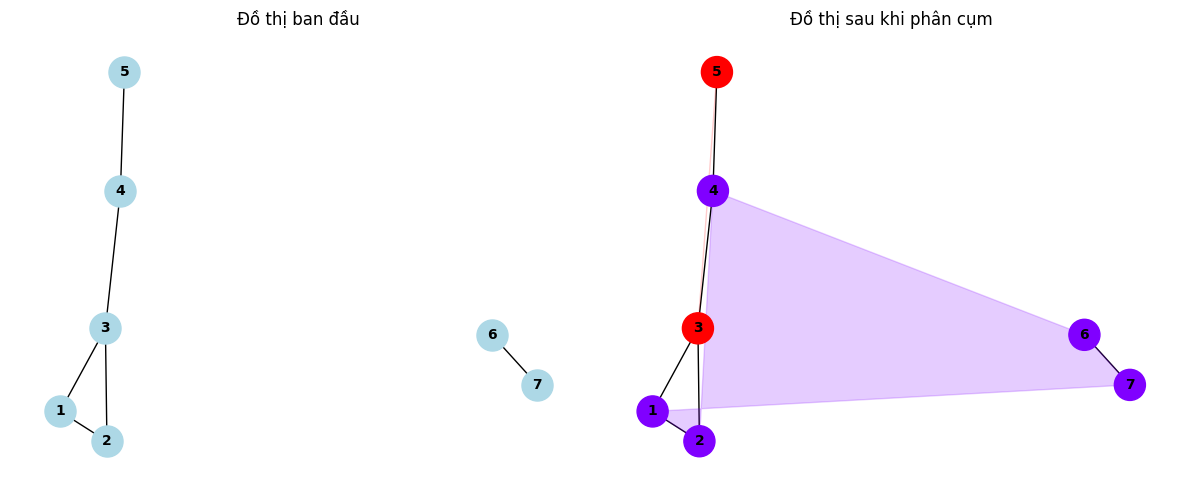

In [20]:
def create_example_graph():
    """
    Create an example graph for testing the ModelSimilarity class.
    Returns:
        G: A NetworkX graph with predefined nodes and edges.
    """
    G = nx.Graph()
    # Add edges between nodes (nodes are created implicitly from edges)
    edges = [
        (1, 2), (1, 3), (2, 3),  # Triangle between nodes 1, 2, 3
        (3, 4),                   # Node 4 connected to node 3
        (4, 5),                   # Node 5 connected to node 4
        (6, 7)                    # Separate edge between nodes 6 and 7 (disconnected component)
    ]
    G.add_edges_from(edges)  # Add edges to the graph
    return G

def main():
  print("create new graph")
  G = create_example_graph()
  ns = NodeSimilarity(G)
  ns.calculate_similarity_matrix()
  ns.print_similarity_matrix()

  # print("\nApplying KMeans clustering...")
  # n_clusters = 2  # Adjust this value as needed
  # cluster_labels = ns.apply_kmeans_clustering(n_clusters=n_clusters)
  # print(f"Cluster labels: {cluster_labels}")

  print("\nApplying spectral clustering...")
  n_clusters = 2  # Adjust this value as needed
  cluster_labels = ns.apply_spectral_clustering(n_clusters=2)
  print(f"Cluster labels: {cluster_labels}")

  # Visualize the clustering
  print("\nVisualizing clusters...")
  ns.visualize_cluster(cluster_labels)

if __name__ == "__main__":
  main()